In [1]:
%matplotlib inline

# Calman Filter
## Question 3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    'font.family':'Times New Roman',
    'text.usetex': True
})
csfont = {'fontname':'Times New Roman'}
from kf import KF, Luenberger, mean_prior
rng = np.random.default_rng()

In [3]:
x0 = np.array([2, 0])
Ps = np.array([[2, 0], [0, 0.16]])
Qs = np.array([[4.9502e-5, 0], [0, 9.8510e-3]])
Qs = np.power(Qs, 2)
PHIs = np.array([[9.9985e-1, 9.8510e-3], [-2.9553e-2, 9.7030e-1]])
# PHIs = np.array([[1, 0], [0, 1]])
GAMMAs = np.eye(2)
UPSILONs = np.eye(2)
Hs = np.array([[1, 0], [0, 1], [1, 1]])
Rs = 0.01 * np.eye(3)
kf = KF(x0=x0, P0=Ps, H=Hs, Q=Qs, R=Rs, PHI=PHIs, GAMMA=GAMMAs, UPSILON=UPSILONs)
mean_prior(kf, [1, 1], 1000)

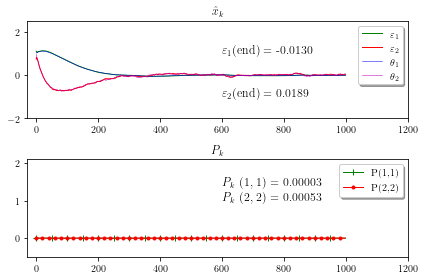

In [4]:
plt.figure()
plt.subplot(2, 1, 1)
plt.title(r"$\hat{x}_k$")
plt.plot([mean[0] for mean in kf.x_hat], 'g', linewidth=1, label=r'$\varepsilon_1$')
plt.plot([mean[1] for mean in kf.x_hat], 'r', linewidth=1, label=r'$\varepsilon_2$')
plt.plot([mean[0] for mean in kf.mean], 'b', linewidth=0.5, label=r'$\theta_1$')
plt.plot([mean[1] for mean in kf.mean], 'm', linewidth=0.5, label=r'$\theta_2$')
leg = plt.legend(loc='upper right', ncol=1, shadow=True, fancybox=True)
plt.text(600, 1, r'$\varepsilon_1$(end) = ' + f"{kf.x_hat[-1][0]:.4f}", fontsize=12)
plt.text(600, -1, r'$\varepsilon_2$(end) = ' + f"{kf.x_hat[-1][1]:.4f}", fontsize=12)
plt.ylim([-2, 2.5])
plt.xlim([-30, 1200])

plt.subplot(2, 1, 2)
plt.title(r"$P_k$")
plt.plot([cov[0][0] for cov in kf.P], 'g', marker='+', markevery=50, linewidth=1, label='P(1,1)')
plt.plot([cov[1][1] for cov in kf.P], 'r', marker='.', markevery=20, linewidth=1, label='P(2,2)')
plt.text(600, 1.4, r'$P_k$ (1, 1) = ' + f"{kf.P[-1][0][0]:.5f}", fontsize=12)
plt.text(600, 1, r'$P_k$ (2, 2) = ' + f"{kf.P[-1][1][1]:.5f}", fontsize=12)
plt.ylim([-0.5, 2.1])
plt.xlim([-30, 1200])
leg = plt.legend(loc='upper right', ncol=1, shadow=True, fancybox=True)

fig = plt.gcf()
plt.tight_layout()
fig.savefig('img/answer20'+'.png', dpi=600)
plt.show()

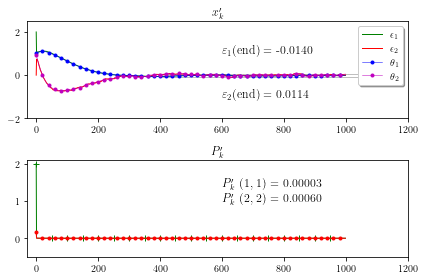

In [5]:
plt.figure()
plt.subplot(2, 1, 1)
plt.title(r"$x^\prime_k$")
plt.plot([mean[0] for mean in kf.x_prime], 'g', linewidth=1, label=r'$\epsilon_1$')
plt.plot([mean[1] for mean in kf.x_prime], 'r', linewidth=1, label=r'$\epsilon_2$')
plt.plot([mean[0] for mean in kf.mean], 'b', linewidth=0.5, marker='.', markevery=20, label=r'$\theta_1$')
plt.plot([mean[1] for mean in kf.mean], 'm', linewidth=0.5, marker='.', markevery=20,  label=r'$\theta_2$')
leg = plt.legend(loc='upper right', ncol=1, shadow=True, fancybox=True)
plt.text(600, 1, r'$\varepsilon_1$(end) = ' + f"{kf.x_prime[-1][0]:.4f}", fontsize=12)
plt.text(600, -1, r'$\varepsilon_2$(end) = ' + f"{kf.x_prime[-1][1]:.4f}", fontsize=12)
plt.hlines(y=3*np.sqrt(0.0006), xmin=400, xmax=1100, linewidth=0.5, color='grey')
plt.hlines(y=-3*np.sqrt(0.0006), xmin=400, xmax=1100, linewidth=0.5, color='grey')
plt.ylim([-2, 2.5])
plt.xlim([-30, 1200])

plt.subplot(2, 1, 2)
plt.title(r"$P^\prime_k$")
plt.plot([cov[0][0] for cov in kf.P_prime], 'g', marker='+', markevery=50, linewidth=1)
plt.plot([cov[1][1] for cov in kf.P_prime], 'r', marker='.', markevery=20, linewidth=1)
plt.text(600, 1.4, r'$P^\prime_k$ (1, 1) = ' + f"{kf.P_prime[-1][0][0]:.5f}", fontsize=12)
plt.text(600, 1, r'$P^\prime_k$ (2, 2) = ' + f"{kf.P_prime[-1][1][1]:.5f}", fontsize=12)
plt.ylim([-0.5, 2.1])
plt.xlim([-30, 1200])

fig = plt.gcf()
plt.tight_layout()
fig.savefig('img/answer21'+'.png', dpi=600)
plt.show()

In [6]:
np.sin(np.pi/180)

0.01745240643728351